# Calculate the Numbers of Rotation of Motors from OpenPose Data

## Hardware Set-up

##### CAMERA

Set-up logitech C615 web camera 2500mm far from the target standing position and 1050mm higher from the ground.
Camera needs to be rotated 90 degree such that captured images will be in portrait mode. The bottom of the camera has to be facing when you stand in front of the camera looking at the lens. Connect to PC a USB PORT. (default is cv2.VideoCapture(1) in the "Camera Calibration" cell. If multiple cameras are connected to the PC, find which camera you are using. e.g. cv2.VideoCapture(1) cv2.VideoCapture(3)... etc)

##### MONITOR

Connect PLANAR PLL2710W Display to PC. (if different monitor is used, adjust window locations and sizes in the "Get Seat Position" cell)

##### SEAT

There are five toggle switches underneath seat cushion. Pulling toggle switches sets the seat control mode to manual. Pushing toggle switches sets the seat control mode to Arduino.  
Connect Arduino to PC USB PORT 3. Set Power Supply 12V (actually 13.8V) and turn it on. Here Arduino has to be connected first to avoid current going into OUTPUT pins on Arduino. 



### Import libraries

In [1]:
import cv2
import numpy as np 
import matplotlib 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import winsound, time, glob

### Camera Calibration (done)

In [ ]:
# # import glob

# # termination criteria
# criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# # prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
# objp = np.zeros((6*8,3), np.float32)
# objp[:,:2] = np.mgrid[0:8,0:6].T.reshape(-1,2)

# # Arrays to store object points and image points from all the images.
# objpoints = [] # 3d point in real world space
# imgpoints = [] # 2d points in image plane.

# # change directory 
# %cd C:\Users\Morio Murase\seat\download\openpose\examples\media\calibrate2
# images = glob.glob('*.jpg')
# for fname in images:
#     img = cv2.imread(fname)
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     # Find the chess board corners
#     ret, corners = cv2.findChessboardCorners(gray, (8,6), None)
#     # If found, add object points, image points (after refining them)
#     if ret == True:
#         objpoints.append(objp)
#         corners2 = cv2.cornerSubPix(gray,corners, (11,11), (-1,-1), criteria)
#         imgpoints.append(corners)
#         # Draw and display the corners
#         cv2.drawChessboardCorners(img, (7,6), corners2, ret)
#         cv2.imshow('img', img)
#         cv2.waitKey(500)
# cv2.destroyAllWindows()

# # calibrate camera 
# ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

# # refine camera matrix
# img = cv2.imread('WIN_20200115_08_59_24_Pro.jpg')
# h,  w = img.shape[:2]
# newcameramtx, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))

# # undistort
# dst = cv2.undistort(img, mtx, dist, None, newcameramtx)

# # crop the image
# x, y, w, h = roi
# dst = dst[y:y+h, x:x+w]
# cv2.imwrite('calibresult.png', dst)
# #cv2.imshow('image',dst)
# time.sleep(10)
# cv2.destroyAllWindows()

In [3]:
# calibration result
x = 2
y = 7
w = 1911
h = 1066
newcameramtx = np.array([[1.44452466e+03, 0.00000000e+00, 9.25707623e+02],
 [0.00000000e+00, 1.44352832e+03, 5.37087150e+02],
 [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

mtx = np.array([[1.47742530e+03, 0.00000000e+00, 9.24360781e+02],
 [0.00000000e+00, 1.47529960e+03, 5.36733275e+02],
 [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

dist = np.array([[-0.05567137, -0.08386561,  0.00039717,  0.00061317,  0.21616431]])
print([x,y,w,h,])
print(newcameramtx)
print(mtx)
print(dist)

# capture video from camera 1
cam = cv2.VideoCapture(1) ############## takes few seconds to finish this command

[2, 7, 1911, 1066]
[[1.44452466e+03 0.00000000e+00 9.25707623e+02]
 [0.00000000e+00 1.44352832e+03 5.37087150e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
[[1.47742530e+03 0.00000000e+00 9.24360781e+02]
 [0.00000000e+00 1.47529960e+03 5.36733275e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
[[-0.05567137 -0.08386561  0.00039717  0.00061317  0.21616431]]


### Get pix2len from image (run one time)

In [4]:
pix2len = 3.9 
### if camera is set as instructed, piX2len value is 3.9.
### if camera is set differently, the above cell needs to be run with 
### the chessboard panel placed at the target standing position. 

## Get Seat Position

C:\Users\Morio Murase\seat\download\openpose
Starting OpenPose demo...
Configuring OpenPose...
Flag `write_keypoint` is deprecated and will eventually be removed. Please, use `write_json` instead.
Starting thread(s)...
---------------------------------- WARNING ----------------------------------
We have introduced an additional boost in accuracy in the CUDA version of about 0.2% with respect to the CPU/OpenCL versions. We will not port this to CPU given the considerable slow down in speed it would add to it. Nevertheless, this accuracy boost is almost insignificant so the CPU/OpenCL versions can be safely used.
-------------------------------- END WARNING --------------------------------
OpenPose demo successfully finished. Total time: 15.566726 seconds.
This image is: <class 'numpy.ndarray'> with dimensions: (633, 478, 3)
C:\Users\Morio Murase\seat\download\openpose
confidence threshold is  0.8
[234.2923174156592, 588.9, 414.30043446754917, 366.7676644296637]


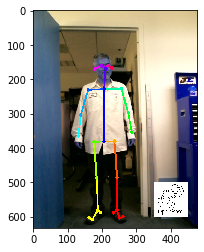

In [54]:
# 1. take picture

# video display setting 
cv2.destroyAllWindows()
name = "11111111111111111111111111111"
cv2.namedWindow(name,cv2.WINDOW_NORMAL)
cv2.moveWindow(name, 2870,-60)
cv2.resizeWindow(name, 480*2,620*2)
result = "0000000000000000000000000000"
cv2.namedWindow(result,cv2.WINDOW_NORMAL)
cv2.moveWindow(result, 1900,-60)
cv2.resizeWindow(result, 480*2,620*2)

#rotate image
rows,cols = 480,640
M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1)
(tx,ty) = ((cols-rows)/2,(rows-cols)/2)
M[0,2] -= tx #third column of matrix holds translation, which takes effect after rotation.
M[1,2] -= ty

# take picture
# input constants #######################################
TakePicTimingAfterVideoCameraOn = 5 # in seconds
# input constants #######################################

startTime = time.time()
stopTime = startTime + TakePicTimingAfterVideoCameraOn

while(time.time()<stopTime):
    # Capture frame-by-frame
    ret, frame = cam.read()

    # rotate image
    frame = cv2.warpAffine(frame,M,(rows,cols))

    # Display the resulting frame
    cv2.imshow(name,frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
# Play sound as if it took a picture and save image
winsound.PlaySound('cameraShutterSound/61059__xef6__350d-shutter.wav',winsound.SND_ASYNC)
time.sleep(1)

# undistort
frame = cv2.undistort(frame, mtx, dist, None, newcameramtx)
# crop the image
#x, y, w, h = roi
frame = frame[y:y+h, x:x+w]
cv2.imwrite(r"C:\Users\Morio Murase\seat\download\openpose\capturedImages\image.jpg",frame)

# run openpose and save processed image and keypoints data
%cd C:\Users\Morio Murase\seat\download\openpose
!bin\OpenPoseDemo.exe --image_dir capturedImages --write_keypoint OpenPoseKeypoints --write_images OpenPoseProcessedImages

# show processed image data on the screen with OpenPose log
img = cv2.imread('OpenPoseProcessedImages\image_rendered.png')
logo = cv2.imread("examples\media\Logo_main_black.png")
logo = cv2.resize(logo,(100,100))
x_offset=350
y_offset=500
img[y_offset:y_offset+logo.shape[0], x_offset:x_offset+logo.shape[1]] = logo
cv2.imshow(result, img)
if cv2.waitKey(1) & 0xFF == ord('q'):
    print("_____")
    
# show an image
print('This image is:', type(img), 'with dimensions:', img.shape)
plt.imshow(img)

# read yaml file, which contain 2D keypoints data, without unnecessary lines and letters, and convert it to np array
import yaml
skip_lines = 6

%cd C:\Users\Morio Murase\seat\download\openpose
with open("OpenPoseKeypoints\image_pose.yml") as infile:
    for i in range (skip_lines):
        _=infile.readline()
    data_ = yaml.load(infile, Loader=yaml.FullLoader)
kp_data=np.asarray(list(data_.values()))

# important keypoints are
c_check = [0,1,8,9,10,11,12,13,14]
# confidence threshold is
conf_thres = 0.8 #############################################################################
print("confidence threshold is ", conf_thres)

points = [] # points[(x1,y1),(x2,y2)...]
# checking confidence
for i in range(int(len(kp_data[0,:])/3)):
    # check confidence.  if it is lower than threshold, get another image and keypoints data set 
    if kp_data[0,3*i+2]<conf_thres and (3*i+2) in c_check:
        # get another picture and keypoints data ################################################################
        print("confidence smaller than ", conf_thres)
    points.append((int(kp_data[0,3*i]),(int(kp_data[0,3*i+1]))))

# calculate length of the body parts
# get pixel length
length = []
lines = [(0,1),(1,8),(9,10),(10,11),(12,13),(13,14)]

for i in lines:
    (a,b) = i
    (x1,y1) = points[a]
    (x2,y2) = points[b]
    length.append(np.sqrt(np.abs(x1-x2)*np.abs(x1-x2)+np.abs(y1-y2)*np.abs(y1-y2))*pix2len)

# take average 
length[2] = (length[2]+length[4])/2
length[3] = (length[3]+length[5])/2
del length[4:]
print(length)

## Kinematics of seating posture and seat linkage

before error handling
[944, 42, 207, 915, 363, 1069, 106, 50, 30]
after error handling
[944, 42, 207, 915, 363, 756, 106, 50, 30]
<944,42,207,915,363,756,106,50,30>
max range
[961, 992, 420, 2450, 1220, 756, 452, 50, 30]


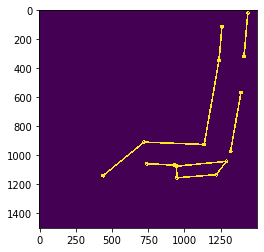

In [55]:
# length of body parts
L1 = int(length[3]) 
L2 = int(length[2]) 
T1 = int(length[1]) 
N1 = int(length[0]) 

# max sensor counts for each motor 
_MCh_ = 961
_MCa_ = 992 
_MT_  = 420
_MR1_ = 2450
_MC_  = 1220
_MH_  = 756
_MR2_ = 452
_LL_  = 50 ##################
_LH_  = 30 ##################
__ = [_MCh_,_MCa_,_MT_,_MR1_,_MC_,_MH_,_MR2_,_LL_,_LH_]

# input constants ################################################################################################
#L1 += 60 #heel hight
Heel_h = 360 #+100
Heel_x = 440 #+120
L1_a = 48*np.pi/180
L2_a = 0*np.pi/180
N1_a = 85*np.pi/180
Knee_b = 30
B3_g3 = 193
B2B3_B3g3_a = 34.7*np.pi/180 
B2B3_g2g3_a = 8*np.pi/180 
X_BASE = 860
x_bc_a = 80*np.pi/180
x_bc_a_deg = x_bc_a*180/np.pi
bc_cd_a = N1_a-x_bc_a
N1_2_de = 0.4 # e[1] = N1[1]+N1*N1_2_de*np.sin(N1_a)
height = L1+L2+T1+N1+200
height_min = 1400
height_max = 1800
heigh2lumber = (height-height_min)/(height_max-height_min)
LL_min = 40
LH_min = 30
#################################################################################################################

# fixed constants ################################################################################################
g1 = (0,345)
g4 = (0,367)
g1g4 = 273
g4g1_a = 4.6*np.pi/180
g4g3 = 115
g3g2 = 345
g2g1min = 78
g2g1max = 125
g4x_max = 427 + X_BASE
g4x_min = 199 + X_BASE
MCh_delta = 7 # difference in MCh degree range. it depends on MCa value
aB3a_max = 470
aB3a_min = 300
g3b = 77
B2B3_bg3_a = 70*np.pi/180
g3g2_bc_a_min = 38.5 #degree
g3g2_bc_a_max = 92 #degree
B2B3_g2g3_a_deg = B2B3_g2g3_a*180/np.pi #degree
L2_a_deg = L2_a*180/np.pi # degree
bc = 410
aa1 = 192
cd = 250
bc_cd_a_min = 0*np.pi/180
bc_cd_a_max = 21.3*np.pi/180
de_min = 200
de_max = 270
#################################################################################################################

increment = 0.3 # for error handling
########################################### loop begin #########################################################################
flag1 = True
flag2 = True
flag3 = True
flag4 = True
while flag1 or flag2 or flag3 or flag4:
    # body keypoints location (x,z)
    L1_x = int(L1*np.cos(L1_a))
    L1_z = int(L1*np.sin(L1_a))
    L2_x = int(L2*np.cos(L2_a))
    L2_z = int(L2*np.sin(L2_a))
    T1_x = int(T1*np.cos(x_bc_a))
    T1_z = int(T1*np.sin(x_bc_a))
    N1_x = int(N1*np.cos(N1_a))
    N1_z = int(N1*np.sin(N1_a))
    B1 = (Heel_x,Heel_h)
    B2 = (Heel_x+L1_x,Heel_h+L1_z)
    B3 = (Heel_x+L1_x+L2_x,Heel_h+L1_z+L2_z)
    B4 = (Heel_x+L1_x+L2_x+T1_x,Heel_h+L1_z+L2_z+T1_z)
    B5 = (Heel_x+L1_x+L2_x+T1_x+N1_x,Heel_h+L1_z+L2_z+T1_z+N1_z)
    BODY = [B1,B2,B3,B4,B5]

    xz_im = np.zeros((1500,1500))
    for i in BODY:
        cv2.circle(xz_im,i,10,color=[255,255,255], thickness=5)
    BODY_LINES = [(0,1),(1,2),(2,3),(3,4)]
    for i in BODY_LINES: 
        (A,B) = i
        cv2.line(xz_im, BODY[A], BODY[B], color=[255,255,255], thickness=10)

    # calculate seat keypoints locations for base frame & MCa MCh
    g3_x = int(B3_g3*np.cos(B2B3_B3g3_a-L2_a))
    g3_z = int(B3_g3*-np.sin(B2B3_B3g3_a-L2_a))
    g3 = ((B3[0]+g3_x),(B3[1]+g3_z))
    g4_x = int(np.sqrt(np.abs(g4g3*g4g3-(g3[1]-g4[1])*(g3[1]-g4[1]))))

    if (g3[1]-g4[1])>g4g3:
        #print("MCh too high")
        g4g3_a = 1
        L1_a -= increment*np.pi/180
        flag1 = True
    else :
        g4g3_a = np.arccos(g4_x/g4g3)*180/np.pi #degree
        flag1 = False
    g4 = (g3[0]-g4_x,g4[1])
    MC = int(_MC_*(g4x_max-g4[0])/(g4x_max-g4x_min)) ############################################
    g1_x = int(g1g4*np.cos(g4g1_a))
    g1 = (g4[0]-g1_x,g1[1])
    g2_x = int(g3g2*np.cos(B2B3_g2g3_a+L2_a))
    g2_z = int(g3g2*np.sin(B2B3_g2g3_a+L2_a))
    g2 = ((g3[0]-g2_x),(g3[1]-g2_z))
    g2g1 = np.sqrt((g2[0]-g1[0])*(g2[0]-g1[0])+(g2[1]-g1[1])*(g2[1]-g1[1]))
    MCa = int(_MCa_*(g2g1-g2g1min)/(g2g1max-g2g1min)) ################################################################
    MCa_alpha = MCh_delta*(g2g1-g2g1min)/(g2g1max-g2g1min)
    g4g3_a_min = 8+MCa_alpha #degree (min depends on MCa)
    g4g3_a_max = 53+MCa_alpha #degree (max depends on MCa)
    MCh = int(_MCh_*(g4g3_a-g4g3_a_min)/(g4g3_a_max-g4g3_a_min)) #########################

    g_frame = [g1,g2,g3,g4]
    for i in g_frame:
        cv2.circle(xz_im,i,10,color=[255,0,0], thickness=5)
    g_LINES = [(0,1),(1,2),(2,3),(3,0)]
    for i in g_LINES: 
        (A,B) = i
        cv2.line(xz_im, g_frame[A], g_frame[B], color=[255,0,0], thickness=10)

    # calculate other seat keypoints locations
    aa = L2-Knee_b 
    MT = int(_MT_*(aa-aB3a_min)/(aB3a_max-aB3a_min)) ################################################
    aB2 = int(np.sqrt((Knee_b*Knee_b)+150*150))
    aB2_a = np.arccos(150/aB2)
    a_x = int(aB2*np.sin(aB2_a+L2_a))
    a_z = int(aB2*np.cos(aB2_a+L2_a))
    a = ((B2[0]+a_x),(B2[1]-a_z))
    a1_x = int(aa1*np.cos(L2_a))
    a1_z = int(aa1*np.sin(L2_a))
    a1 = ((a[0]+a1_x),(a[1]+a1_z))
    b_x = int(g3b*np.cos(B2B3_bg3_a+L2_a))
    b_z = int(g3b*np.sin(B2B3_bg3_a+L2_a))
    b = ((g3[0]+b_x),(g3[1]+b_z))
    MR1 = int(_MR1_-_MR1_*(x_bc_a_deg-B2B3_g2g3_a_deg-L2_a_deg-g3g2_bc_a_min)/(g3g2_bc_a_max-g3g2_bc_a_min)) ############################
    c_x = int(bc*np.cos(x_bc_a))
    c_z = int(bc*np.sin(x_bc_a))
    c = ((b[0]+c_x),(b[1]+c_z))
    d_x = int(cd*np.cos(x_bc_a+bc_cd_a))
    d_z = int(cd*np.sin(x_bc_a+bc_cd_a))
    d = ((c[0]+d_x),(c[1]+d_z))
    MR2 = int(_MR2_*(bc_cd_a-bc_cd_a_min)/(bc_cd_a_max-bc_cd_a_min))
    de_a = x_bc_a+bc_cd_a
    ezdz = B5[1]+N1*N1_2_de*np.sin(N1_a)-d[1]
    de = int(ezdz/np.sin(de_a))
    e_x = int(de*np.cos(de_a))
    e = ((d[0]+e_x),(B5[1]+int(N1*N1_2_de*np.sin(N1_a))))
    MH = int(_MH_*(de-de_min)/(de_max-de_min))    ####################################################

    abcde = [a,a1,b,c,d,e]
    for i in abcde:
        cv2.circle(xz_im,i,10,color=[255,0,0], thickness=5)
    abcde_LINES = [(0,1),(2,3),(4,5)]
    for i in abcde_LINES: 
        (A,B) = i
        cv2.line(xz_im, abcde[A], abcde[B], color=[255,0,0], thickness=10)
        
    if flag1 == False and MCh > _MCh_:
        #print("MCh still too high")
        L2_a -= increment*np.pi/180
        flag2 = True
    else:
        flag2 = False
    
    if MCa<0:
        L1_a += increment*np.pi/180
        flag3 = True
        #print("MCa negative")
        #print(MCa)
    else:
        flag3 = False
    if MC<0:
        L2_a -= increment*np.pi/180
        flag4 = True
        #print("MC too far")
    else:
        flag4 = False        
        
    #print(flag1,flag2,flag3,flag4)
############################### end of loop ########################################################################
        
# calculate lumber inflation time
LL = (_LL_-LL_min)*heigh2lumber+LL_min
LH = (_LH_-LH_min)*heigh2lumber+LH_min
LL = int(LL)
LH = int(LH)

MOTOR = [MCh,MCa,MT,MR1,MC,MH,MR2,LL,LH]
print('before error handling')
print(MOTOR)

# error handling
if MH<0:
    MH=0
    #print("MH too small")
elif MH>_MH_:
    MH=_MH_
    #print("MH too high")
if MT<0:
    MT=0
    #print("MT too small")
elif MT>_MT_:
    MT=_MT_
    #print("MT too long")
if LL>_LL_:
    LL=_LL_
if LH>_LH_:
    LH=_LH_
if MCa<0:
    MCa=0
    #print("MCa too small")
if MC>_MC_:
    MC=_MC_
    #print("MC too long")
if MR2>_MR2_:
    MR2=_MR2_
    #print("MR2 too forward")
if MCh<0:
    MCh=0
    #print("MCh too low")

plt.imshow(cv2.flip(xz_im, 0))
print('after error handling')
MOTOR = [MCh,MCa,MT,MR1,MC,MH,MR2,LL,LH]
print(MOTOR)

# send string command to arduino
numbers = ""
for i in MOTOR:
    numbers += str(i)
    numbers += ','
MOTOR_str = "<"+numbers[:-1]+">"
print(MOTOR_str)

print('max range')
print(__)


### Connect To Arduino Serial Port (run once)

In [8]:
import serial
import time
arduino = serial.Serial('COM3',9600)
time.sleep(1)
if arduino.is_open:
    print("connected to: " + arduino.portstr)
else:
    print("error connecting to: " + arduino.name)

connected to: COM3


### Go To Specified Potision

In [58]:
while arduino.in_waiting:
    print(arduino.readline().decode('ascii'))

arduino.write(str.encode('c'))
time.sleep(1)
print("'c' pressed")

while arduino.in_waiting:
    print(arduino.readline().decode('ascii'))

arduino.write(str.encode(MOTOR_str))
time.sleep(1)
print("numbers entered: "+MOTOR_str)

while arduino.in_waiting:
    print(arduino.readline().decode('ascii'))

3 motor turned off 

2 motor moved to home posi 

4 motor turned reverse 

5 motor turned reverse 

motor2 reached end of track

5 motor turned off 

motor reached end of track 

4 motor turned off 

4 motor moved to home posi 

6 motor turned reverse 

motor reached end of track

6 motor turned off 

7th motors moved to home posi 

both 1&3 valcves closed 

0, 0, -6, 454, 0, 0, 0, 0, 0, 

 Home Zeroposi Continue  Display 

'c' pressed
0, 0, -6, 454, 0, 0, 0, 0, 0, 

 <  >

numbers entered: <944,42,207,915,363,756,106,50,30>
944, 42, 207, 915, 363, 756, 106, 50, 30,  inpuat data read

lumber both deflatings..... 

0 motor turned forward 

1 motor turned forward 

1 motor turned off 



In [ ]:
# while arduino.in_waiting:
#     print(arduino.readline().decode('ascii'))

### save the data

In [ ]:
# rename with timestamp and move processed data to storage folder
import datetime
dt = str(datetime.datetime.now())
dt = dt[5:7]+"_" +dt[8:10]+ "_" + dt[11:13] + dt[14:16]
import os
newname = "OpenPoseDataStorage\image_rendered_" + dt + ".png"
os.rename("OpenPoseProcessedImages\image_rendered.png", newname)
newname = "OpenPoseDataStorage\image_pose" + dt + ".yml"
os.rename("OpenPoseKeypoints\image_pose.yml", newname)

# remove captured image
try: 
    os.remove("capturedImages\image.jpg")
except: 
    print("error")
    pass

# # change directory
# %cd C:\Users\Morio Murase\seat\download\openpose
# take picture with camera 2
# s, img2 = cam2.read()
# imname = "OpenPoseDataStorage\SeatingImage_" + dt + ".png"
# cv2.imwrite(imname,img2)
# plt.imshow(img2)

### Reset to Zero Position

In [56]:
while arduino.in_waiting:
    print(arduino.readline().decode('ascii'))

arduino.write(str.encode('z'))
time.sleep(1)
print("'z' pressed")

while arduino.in_waiting:
    print(arduino.readline().decode('ascii'))

motor reached end of track 

0 motor turned off 

0 motor moved to home posi 

2 motor turned reverse 

3 motor turned reverse 

motor reached end of track 

2 motor turned off 

3 motor turned off 

2 motor moved to home posi 

4 motor turned reverse 

5 motor turned reverse 

5 motor turned off 

motor reached end of track 

4 motor turned off 

4 motor moved to home posi 

6 motor turned reverse 

motor reached end of track

6 motor turned off 

7th motors moved to home posi 

both 1&3 valcves closed 

0, 0, -20, 446, -1, -104, 0, 0, 0, 

 Home Zeroposi Continue  Display 

'z' pressed
lumber both deflatings..... 

counters before move to zero to see overrun from prior rotation of motors

0,0,4,3,4,9,0,

0 motor turned reverse 

1 motor turned reverse 

motor reached end of track 

0 motor turned off 

motor2 reached end of track

1 motor turned off 

2 motor turned reverse 

3 motor turned reverse 

motor reached end of track 

2 motor turned off 



### Go To Home Position

In [57]:
while arduino.in_waiting:
    print(arduino.readline().decode('ascii'))

arduino.write(str.encode('h'))
time.sleep(1)
print("'h' pressed")

while arduino.in_waiting:
    print(arduino.readline().decode('ascii'))

motor2 reached end of track

3 motor turned off 

4 motor turned reverse 

5 motor turned reverse 

motor reached end of track 

4 motor turned off 

motor2 reached end of track

5 motor turned off 

6 motor turned reverse 

6 motor turned off 

both 1&3 valcves closed 

0, 0, 0, 0, 0, 0, 0, 0, 0, 

 Home Zeroposi Continue  Display 

'h' pressed
lumber both deflatings..... 

0 motor turned reverse 

1 motor turned reverse 

motor reached end of track 

0 motor turned off 

motor2 reached end of track

1 motor turned off 

0 motor moved to home posi 

2 motor turned reverse 

3 motor turned forward 

motor reached end of track 

2 motor turned off 



### Close the port 

In [ ]:
arduino.close()
if arduino.is_open:
    print("still connected to: " + arduino.portstr)
else:
    print("disconnected successfully: " + arduino.name)

### close the display, and release camera 

In [ ]:
# When everything done, release the capture
cam.release()
#cam2.release()
cv2.destroyAllWindows()

In [ ]:
cv2.destroyAllWindows()

### Display Counter Numbers and Current Positions

In [ ]:
while arduino.in_waiting:
    print(arduino.readline().decode('ascii'))

arduino.write(str.encode('d'))
time.sleep(1)
print("'d' pressed")

while arduino.in_waiting:
    print(arduino.readline().decode('ascii'))